**Visualizing Beehive Data**

In [36]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
cd dataset

C:\Users\Doğukan\Desktop\bee_analysis\dataset


In [15]:
temperature_data_w = pd.read_csv('temperature_wurzburg.csv', sep = ',');
flow_data_w = pd.read_csv('flow_wurzburg.csv', sep = ',');
humidity_data_w = pd.read_csv('humidity_wurzburg.csv', sep = ',');
weight_data_w = pd.read_csv('weight_wurzburg.csv', sep = ',');

**TEMPERATURE**

In [30]:
temperature_time_arr_w = pd.to_datetime(temperature_w['timestamp'])

ts_temperature_w = pd.Series(data=temperature_w['temperature'].values,
                             index=temperature_time_arr_w,
                             dtype="float")

# If you want to ensure the index is sorted
ts_temperature_w = ts_temperature_w.sort_index()

In [17]:
ts_temperature_hour_w = ts_temperature_w.resample("H").mean()

C:\Users\Doğukan\AppData\Local\Temp\ipykernel_21240\4187849561.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts_temperature_hour_w = ts_temperature_w.resample("H").mean()


<Axes: title={'center': 'Temperature per hour'}, xlabel='timestamp'>

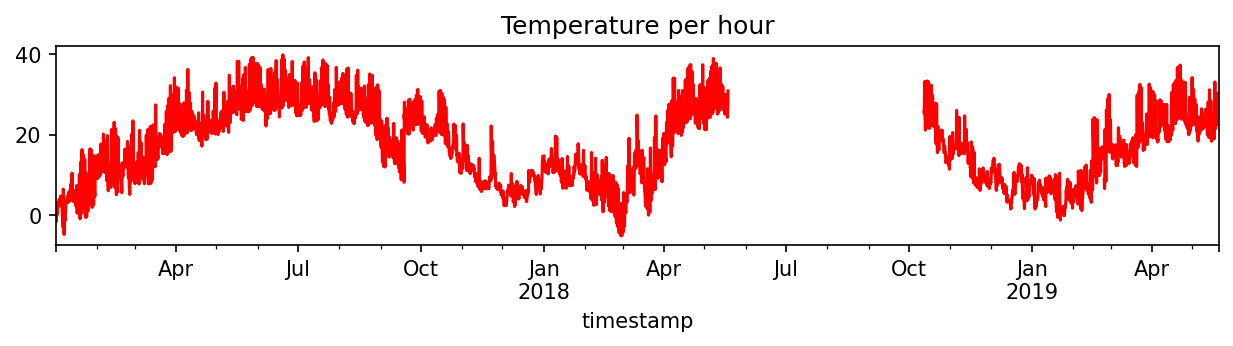

In [35]:
plt.figure(1, figsize=(10,5), dpi=150)
plt.subplots_adjust(hspace = 0.9)
plt.subplot(211)
ts_temperature_hour_w.plot(title="Temperature per hour", color="red")

**FLOW**

In [19]:
flow_time_arr_w = pd.to_datetime(flow_data_w.timestamp)
ts_flow_w = pd.Series(data=np.array(flow_data_w.flow), 
                           index=pd.DatetimeIndex(flow_time_arr_w), dtype="float")

In [20]:
ts_flow_hour_w = ts_flow_w.resample("H").sum()

C:\Users\Doğukan\AppData\Local\Temp\ipykernel_21240\1644283270.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts_flow_hour_w = ts_flow_w.resample("H").sum()


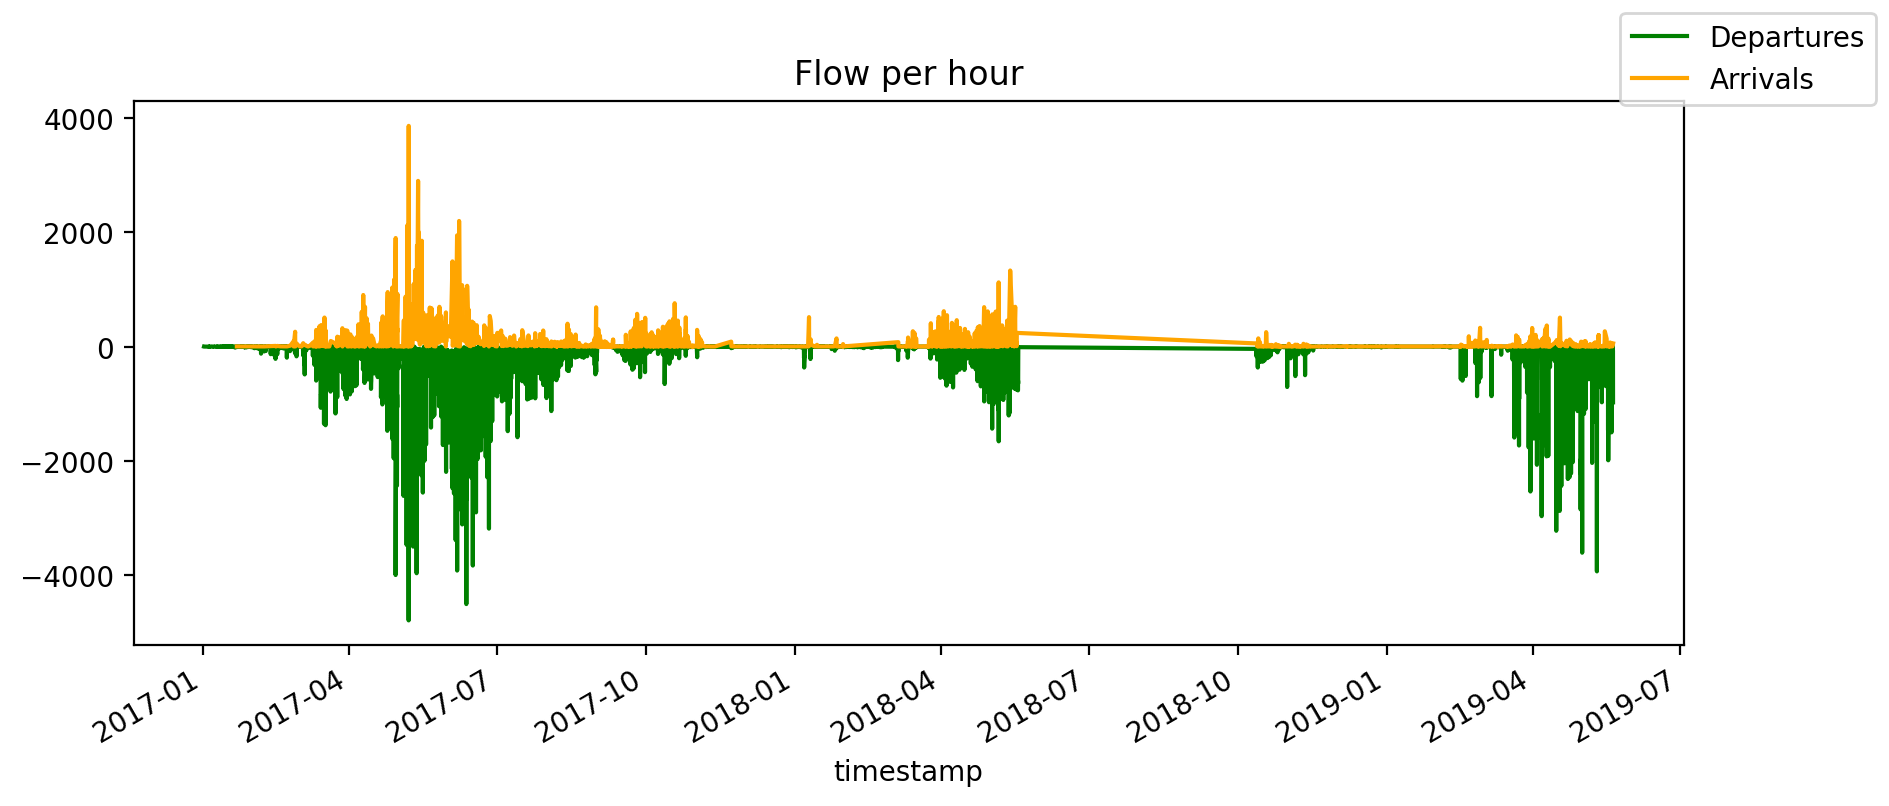

In [34]:
ax = plt.figure(figsize=(10,4), dpi=200)
ts_flow_hour_w[ts_flow_hour_w < 0].plot(title="Flow per hour", color="green", label = "Departures")
ts_flow_hour_w[ts_flow_hour_w > 0].plot(color="orange", label = "Arrivals")
leg = ax.legend();

**HUMIDITY**

In [24]:
humidity_time_arr_w = pd.to_datetime(humidity_data_w.timestamp)
ts_humidity_w = pd.Series(data=np.array(humidity_data_w.humidity), 
                           index=pd.DatetimeIndex(humidity_time_arr_w), dtype="float")

In [25]:
ts_humidity_day_w = ts_humidity_w.resample("D").mean()

<Axes: title={'center': 'Humidity per day'}, xlabel='timestamp'>

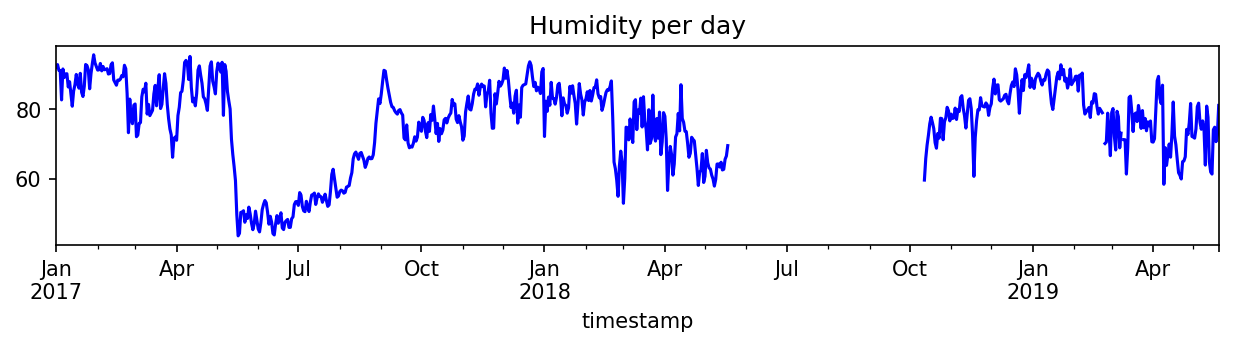

In [33]:
plt.figure(1, figsize=(10,5), dpi=150)
plt.subplots_adjust(hspace = 0.9)
plt.subplot(211)
ts_humidity_day_w.plot(title="Humidity per day", color="blue")

In [27]:
weight_time_arr_w = pd.to_datetime(weight_data_w.timestamp)
ts_weight_w = pd.Series(data=np.array(weight_data_w.weight), 
                           index=pd.DatetimeIndex(weight_time_arr_w), dtype="float")

In [28]:
ts_weight_day_w = ts_weight_w.resample("D").mean()

<Axes: title={'center': 'Weight per day'}, xlabel='timestamp'>

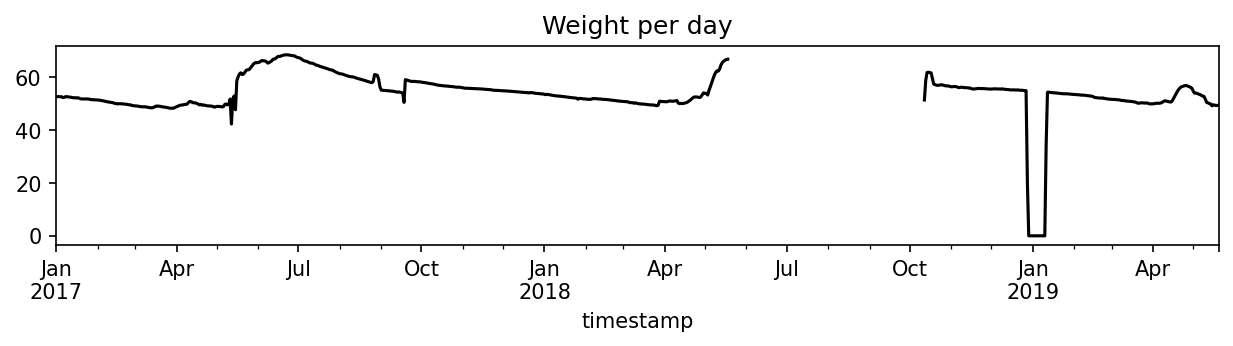

In [32]:
plt.figure(1, figsize=(10,5), dpi=150)
plt.subplots_adjust(hspace = 0.9)
plt.subplot(211)
ts_weight_day_w.plot(title="Weight per day", color="black")